In [1]:
# Scikit-learn version 0.24.2
from sklearn.datasets import fetch_openml
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
mnist = fetch_openml('mnist_784', version=1)
X, y = mnist["data"], mnist["target"]
y = y.astype(np.uint8)
X_tr, X_ts, y_tr, y_ts = train_test_split(X, y, test_size=10000, random_state=42)

In [3]:
sgd_clf = SGDClassifier()
sgd_clf.fit(X_tr, y_tr)

SGDClassifier()

In [4]:
cross_val_score(sgd_clf, X_tr, y_tr, cv=3, scoring ="accuracy")

array([0.87225, 0.8771 , 0.883  ])

In [9]:
y_tr_pred = cross_val_predict(sgd_clf, X_tr, y_tr, cv=3)
accuracy_score(y_tr, y_tr_pred)

0.8722666666666666

In [10]:
confusion_matrix(y_tr, y_tr_pred)

array([[5686,    0,   23,   25,    9,   58,   38,    4,   51,   26],
       [   4, 6390,   64,   22,   11,   53,   11,   12,  117,   41],
       [  98,   53, 5205,  135,   77,   50,  117,   59,  193,   36],
       [  52,   23,  236, 4912,   29,  425,   38,   63,  173,  156],
       [  24,   23,   37,    8, 5331,   23,   49,   23,   85,  315],
       [  85,   21,   43,  153,   76, 4466,  172,   20,  240,  100],
       [  56,   18,   60,   15,   40,  127, 5539,    2,   52,    6],
       [  25,   26,   95,   36,  102,   36,    6, 5398,   37,  477],
       [  77,   92,  137,  199,   82,  481,   61,   24, 4255,  448],
       [  38,   21,   26,   55,  211,   72,    3,  187,  155, 5154]],
      dtype=int64)

<function matplotlib.pyplot.show(close=None, block=None)>

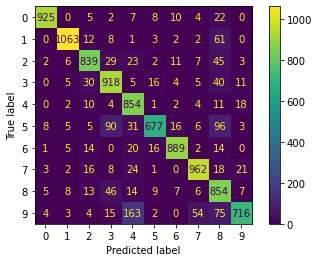

In [11]:
plot_confusion_matrix(sgd_clf, X_ts, y_ts)
plt.show

In [12]:
cm = confusion_matrix(y_tr, y_tr_pred)
row_sums = cm.sum(axis=1, keepdims=True)
norm_cm = cm / row_sums

<function matplotlib.pyplot.show(close=None, block=None)>

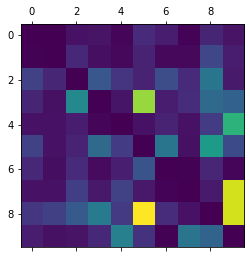

In [13]:
np.fill_diagonal(norm_cm, 0)
plt.matshow(norm_cm, cmap=plt.cm.viridis)
plt.show

In [15]:
norm_cm

array([[0.        , 0.        , 0.00388514, 0.00422297, 0.00152027,
        0.0097973 , 0.00641892, 0.00067568, 0.00861486, 0.00439189],
       [0.0005948 , 0.        , 0.00951673, 0.00327138, 0.00163569,
        0.00788104, 0.00163569, 0.00178439, 0.01739777, 0.00609665],
       [0.01627096, 0.0087996 , 0.        , 0.02241408, 0.01278433,
        0.00830151, 0.01942554, 0.00979578, 0.03204383, 0.00597709],
       [0.00851482, 0.00376617, 0.03864418, 0.        , 0.00474865,
        0.06959227, 0.00622237, 0.01031603, 0.02832815, 0.02554446],
       [0.00405542, 0.00388645, 0.00625211, 0.00135181, 0.        ,
        0.00388645, 0.00827982, 0.00388645, 0.01436296, 0.05322744],
       [0.01581101, 0.00390625, 0.00799851, 0.02845982, 0.0141369 ,
        0.        , 0.03199405, 0.00372024, 0.04464286, 0.01860119],
       [0.00946746, 0.00304311, 0.0101437 , 0.00253593, 0.00676247,
        0.02147084, 0.        , 0.00033812, 0.00879121, 0.00101437],
       [0.00400769, 0.004168  , 0.0152292